In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

- 이미지 주파수 : https://idlecomputer.tistory.com/120
- 이미지 주파수 : https://kylog.tistory.com/36
- 이미지 필터링 : https://datascienceschool.net/view-notebook/c4121d311aa34e6faa84f62ef06e43b0/

# 이미지 주파수
    이미지도 음성 신호처럼 주파수로 표현할 수 있다. 일반적으로 고주파는 밝기 변화가 많은 곳, 즉 경계선(edge) 영역에서 나타나며, 저주파는 밝기 변화가 적은 곳인 배경의 영역에 주로 나타난다. 이를 이용해 고주파를 제거하면 경계선의 변화가 약해져 Blur 처리가 되고, 저주파를 제거하면 배경 영역이 흐려져 대상의 영역(edge)를 뚜렷하게 확인할 수 있다.
    
    Low-pass Filter(LPF)와 High-pass Filter(HPF)를 이용해 LPF(저주파만 통과)를 적용하면 노이즈를 제거하거나 Blur 처리를 할 수 있으며 HPF(고주파만 통과)를 적용하면 경계선을 찾을 수 있다.

# 이미지 필터링 (Image Filtering)
    이미지 필터링은 kernel(filter)라고 하는 정방행렬을 정의하고, 이 커널을 이미지 위에서 이동시켜가면서 커널과 겹쳐진 이미지 영역과 연산한 후 그 결과값을 연산을 진행한 이미지 픽셀을 대신하여 새로운 이미지를 만드는 연산이다. (kernel을 사용하는 대부분의 이미지 처리 과정이 이와 비슷하다.) openCV에서는 이미지와 kernel(filter)를 Convolution(합성곱)하여 이미지를 필터링 해주는 함수, cv2.filter2D를 제공한다. 필터링할 이미지와 kernel이 있으면 cv2.filter2D 함수를 통해 필터링된 이미지를 반환한다. 
    
    필터링하는 방법에는 여러 종류가 있는데 대표적으로 이미지의 픽셀 값을 해당 픽셀의 이웃과 평균하여 그 값을 취하도록 하는 "Average Filter"가 있다. 커널의 크기를 5 * 5라고 하면, Average Filtering하기 위한 커널의 형태는 다음과 같다.
    
    K = 1 / 25 * [ 1, 1, 1, 1, 1 ]
                 [ 1, 1, 1, 1, 1 ]
                 [ 1, 1, 1, 1, 1 ] 
                 [ 1, 1, 1, 1, 1 ]
                 [ 1, 1, 1, 1, 1 ]
    모든 Filtering 커널 행렬의 전체 원소의 합은 1이 되도록 만들어지기 때문에 총 원소의 합(25)으로 나누어 정규화한다.
    
    해당 커널이 적용되는 방법은 다음과 같다.
    1. 픽셀을 중심으로 5 * 5의 영역을 만든다.
    2. 이 영역에 속하는 픽셀 값과 커널을 곱하여 그 값을 합친다.
    3. 더한 값을 25로 나누고 이 값을 적용한 픽셀 값으로 초기화 한다.
    이러한 계산방법 덕분에 커널이 커지면 커질수록 이미지는 더더욱 흐려진다.

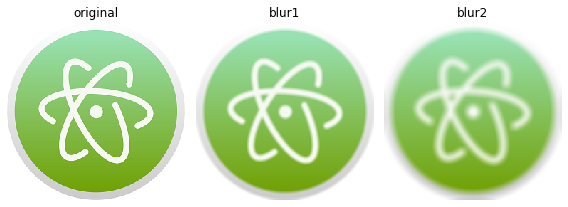

In [2]:
img = cv2.imread('atom-4.png')

kernel1 = np.ones((5, 5), np.float32)/25
kernel2 = np.ones((11, 11), np.float32)/121
blur1 = cv2.filter2D(img, -1, kernel1)
blur2 = cv2.filter2D(img, -1, kernel2)

cv2.imshow('original', img)
cv2.imshow('blur1', blur1)
cv2.imshow('blur2', blur2)
cv2.waitKey(0)
cv2.destroyAllWindows()

images = [img, blur1, blur2]
titles = ["original", "blur1", "blur2"]
plt.figure(figsize=(8, 8))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## cv2.filter2D(src, ddepth, kernel [, dst [, anchor [, delta [, borderType]]]]) → dst
    1. src : 입력 이미지
    2. ddepth : 출력 이미지에 적용되는 이미지의 깊이 (자료형 크기), -1이면 입력과 동일하게 적용된다. 입력이미지와 출력이미지의 조합을 확인해보고 싶으면 Image Filtering에서 depth combination을 확인해보면 된다.
    3. kernel : 합성곱 kernel, 해당 kernel은 float 상수로 구성된 단일 채널이어야 한다. 다른 채널에 각각 다른 커널을 적용하고 싶다면 split 함수를 이용해 해당 이미지의 채널을 분리한 뒤 개별적으로 적용해야 한다.
    4. anchor : 커널 내에서 필터링된 지점의 상대적 위치를 나타내는 커널의 앵커(닻), 즉 필터링할 이미지 픽셀의 위치가 커널의 어디에 존재해야 하는지 그 기준점을 지정해준다. default = (-1, -1)로 앵커가 커널의 중심에 있음을 의미한다.
    5. delta : dst에 저장하기 전에 필터링된 픽셀에 추가적으로 더해주는 값 (bias의 역할)

### openCV 에서의 이미지 Data Type
- CV_8U : 8-bit unsigned integer: uchar ( 0..255 )
- CV_8S : 8-bit signed integer: schar ( -128..127 )
- CV_16U : 16-bit unsigned integer: ushort ( 0..65535 )
- CV_16S : 16-bit signed integer: short ( -32768..32767 )
- CV_32S : 32-bit signed integer: int ( -2147483648..2147483647 )
- CV_32F : 32-bit floating-point number: float ( -FLT_MAX..FLT_MAX, INF, NAN )
- CV_64F : 64-bit floating-point number: double ( -DBL_MAX..DBL_MAX, INF, NAN )

일반적으로 Data Type과 채널 수가 같이 표현이 되어 CV_8UC1과 같이 표현된다. (8bit unsigned integer 이면서 채널이 1개)

In [3]:
# Trackbar로 kernel size 조정하기
def onChange(x):
    pass

def filteringTrackbar():
    img = cv2.imread('The-original-Gaussian-noisy-image-The-Gaussian-noise-parameters-are-zero-mean-and.png')
    cv2.namedWindow('filtering')
    cv2.createTrackbar('SIZE', 'filtering', 1, 20, onChange)
    cv2.imshow('filtering', img)
    
    while True:
        k = cv2.waitKey(0) & 0xFF
        if k == 27:
            break
            
        size = cv2.getTrackbarPos('SIZE', 'filtering')
        if size == 0:
            size = 1
        
        kernel = np.ones((size, size), np.float32)/(size * size)
        dst = cv2.filter2D(img, -1, kernel)
        
        cv2.imshow('filtering', dst)
    cv2.destroyAllWindows()

In [4]:
filteringTrackbar()

---
# 이미지 블러링 (Image Blurring)
    블러, Blur는 이미지 필터링을 사용하여 이미지를 흐리게 만드는 것을 의미한다. 주로 LPF(Low-pass Filter)를 이용해 고주파 영역을 제거함으로써 노이즈를 제거하거나 경계선을 흐리게 할 수 있다. openCV에서는 아래 4가지 블러링 기술을 제공하고 있다.
    1. Averaging
    2. Gaussian Filtering
    3. Median Filtering
    4. Bilateral Filtering

## 1. Averaging
    균일한 값을 가전 정규화 된 커널을 이용한 이미지 필터링 방법으로 커널 영역 내에서 평균 값으로 해당 픽셀을 대체한다. 앞서 살펴봤던 Averaging Filtering과 동일한 방법이지만, 차이점으로는 위에서는 직접 kernel을 만들었다면, 이번에는 blur 함수를 통해 정규화된 kernel를 만들었다는 것이다. blur 함수는 boxFilter 함수와 동일하게 적용된다. 커널의 형태는 다음과 같다. 
    
    K = 1 / 25 * [ 1, 1, 1, 1, 1 ]
                 [ 1, 1, 1, 1, 1 ]
                 [ 1, 1, 1, 1, 1 ] 
                 [ 1, 1, 1, 1, 1 ]
                 [ 1, 1, 1, 1, 1 ]
    
## cv2.blur(src, ksize [, dst [, anchor [, borderType]]]) → dst
    정규화된 box filter를 이용해 이미지를 블러처리하는 함수이다.
    1. src : 입력 이미지, 채널 수는 상관 없으나 다음과 같은 데이터 타입에만 사용할 수 있다. (CV_8U, CV_16U, CV_16S, CV_32F, CV_64F)
    2. ksize : 커널의 크기
    입력 이미지와 커널의 크기 등을 인자로 전달하면, blur 함수 내에서 정규화된 커널을 만들고 해당 커널을 입력 이미지에 적용하여 블러 처리된 이미지를 출력한다.

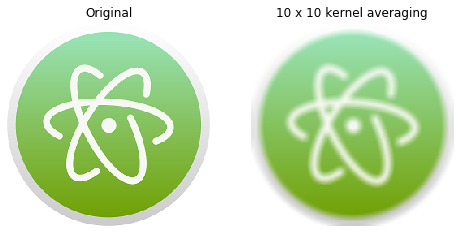

In [5]:
img = cv2.imread('atom-4.png')
img_average = img.copy()

k_size = 10
average = cv2.blur(img_average, (k_size, k_size))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_average)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(average)
plt.title('10 x 10 kernel averaging')
plt.axis('off')
plt.show()

---
## 2. Gaussian Filtering
    앞서 Averaging 방법과 같은 경우는 동일한 값으로 구성된 커널을 사용하지만 Gaussian Filtering 방법의 경우에는 가우시안 함수를 이용한 커널을 적용한다. 즉, 커널의 행렬 값을 가우시안 함수를 통해 수학적으로 생성하여 적용한다. 따라서 중앙 위치에 놓인 픽셀과 가까울 수록 가중치가 높아지고 멀어질 수록 가중치가 작아져 중앙 픽셀과 멀어질 수록 해당 픽셀값에 대한 영향력이 작아진다. ★★ 가우시안 필터링의 경우 전체적으로 Gaussian Noise (전체적으로 밀도가 동일한 노이즈, 백색노이즈 등)를 제거하는데 가장 효과적이다.

## cv2.GaussianBlur(src, ksize, sigmaX [, dst [, sigmaY [, borderType]]]) → dst
    1. src : 입력 이미지. 채널 수는 상관 없으나 다음과 같은 데이터 타입에만 사용할 수 있다. (CV_8U, CV_16U, CV_16S, CV_32F, CV_64F)
    2. ksize : 커널의 크기. GaussianBlur를 적용하기 위한 커널의 크기는 반드시 양수의 홀수이어야 한다.
    3. sigmaX : 가우시안 커널의 X방향 표준편차
    4. sigmaY : 가우시안 커널의 Y방향 표준편차 (sigmaY = 0이면 sigmaX와 같은 크기가 적용된다. 만약 X와 Y 둘 모두 크기가 0이라면 커널의 너비와 높이에 따라 계산된다.)

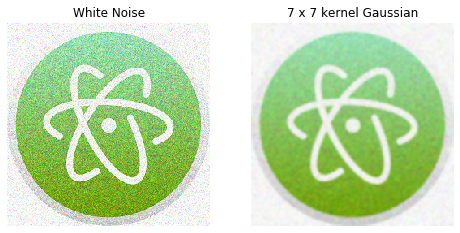

In [6]:
img = cv2.imread('atom-4.png')
img_gaussian = img.copy()
img_gaussian = np.clip((img / 255 + np.random.normal(scale = 0.1, size = img.shape)) * 255, 0, 255).astype('uint8')

k_size = 7
gaussian = cv2.GaussianBlur(img_gaussian, (k_size, k_size), 0)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_gaussian)
plt.title('White Noise')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian)
plt.title('7 x 7 kernel Gaussian')
plt.axis('off')
plt.show()

---
## 3. Median Filtering
    Median Filtering 방법과 같은 경우에는 따로 kernel을 만들어 합성곱하지 않고, kernel window에 있는 모든 픽셀들을 정렬한 후 중간값을 선택하여 적용한다. ★★ 중간값 필터링의 경우, 점 잡음(salt-and-pepper noise) 제거에 효과적이다.
    
## medianBlur(src, ksize [, dst]) → dst
    1. src : 입력 이미지, 채널 수가 1, 3, 4개여야 한다. 또한 이미지 타입은 CV_8U여야 한다.
    2. ksize : 커널의 크기. MedianBlur를 적용하기 위한 커널의 크기는 반드시 1보다 큰 홀수여야 한다.

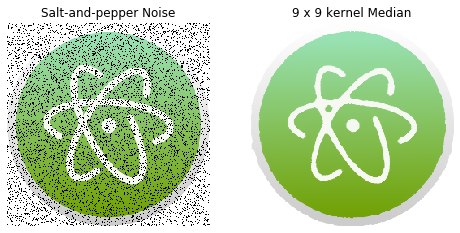

In [7]:
img = cv2.imread('atom-4.png')
img_median = img.copy()

np.random.seed(0)
N = 10000
idx1 = np.random.randint(img_median.shape[0], size = N)
idx2 = np.random.randint(img_median.shape[1], size = N)
img_median[idx1, idx2] = 0

k_size = 9
median = cv2.medianBlur(img_median, k_size)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_median)
plt.title('Salt-and-pepper Noise')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median)
plt.title('9 x 9 kernel Median')
plt.axis('off')
plt.show()

---
## 4. Bilateral Filtering
    지금까지의 Blur 처리는 경계선까지 Blur처리가 되어 경계선이 흐려지게 된다면 Bilateral Filtering(양방향 필터링)의 경우에는 경계선을 유지하면서 Gaussian Filtering이 하는 것처럼 Blur 처리를 해주는 방법이다. 가우시안 필터링에는 두 픽셀의 거리 차이만 고려하지만 양방향 필터링의 경우에는 두 픽셀의 명암값 차이또한 커널에 넣어서 가중치로 곱한다. 따라서 픽셀 값의 차이가 너무 크면 가중치가 0에 가까운 값이 되어 합쳐지지 않으므로 영역과 영역사이의 경계선이 잘 보존될 수 있다.
    
## cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace [, dst [, borderType]]) → dst
    1. src : 8 bit, 채널 수가 1, 3인 이미지
    2. d : 커널의 크기, 필터링 시 고려할 주변 픽셀의 지름. 양수가 아니면 sigmaSpace로 계산된다.
    3. sigmaColor : 색공간 표준편차. 값이 크면 색이 많이 달라도 서로 영향을 미친다.
    4. sigmaSpace : 거리공간 표준편차. 값이 크면 멀리 떨어져 있는 픽셀들이 서로 영향을 미친다. d가 양수이면 sigmaSpace에 상관없이 인접한 픽셀들에 영향을 미치지만, 그렇지 않으면 d는 sigmaSpace에 비례한다.

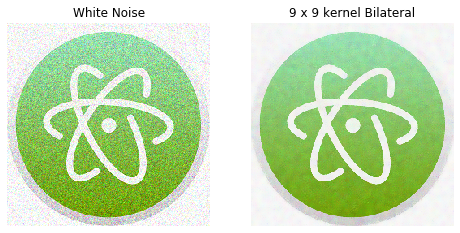

In [8]:
img = cv2.imread('atom-4.png')
img_bilateral = img.copy()
img_bilateral = np.clip((img / 255 + np.random.normal(scale = 0.1, size = img.shape)) * 255, 0, 255).astype('uint8')

k_size = 9
bilateral = cv2.bilateralFilter(img_bilateral, k_size, 75, 75)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_bilateral)
plt.title('White Noise')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bilateral)
plt.title('9 x 9 kernel Bilateral')
plt.axis('off')
plt.show()

In [21]:
def onChange(x):
    pass

def blurringTrackbar():
    img = cv2.imread('atom-4.png')
    cv2.namedWindow('blurring', cv2.WINDOW_NORMAL)
    cv2.createTrackbar('MODE', 'blurring', 0, 3, onChange)
    cv2.createTrackbar('size', 'blurring', 1, 10, onChange)
    cv2.imshow('blurring', img)
    
    while True:
        k = cv2.waitKey(0) & 0xFF
        if k == 27:
            break
        
        mode = cv2.getTrackbarPos('MODE', 'blurring')
        size = cv2.getTrackbarPos('size', 'blurring')
        size = size * 2 + 1
        if size == 0:
            size = 1
        
        try:
            # Averaging
            if mode == 0:
                blur = cv2.blur(img, (size, size))
                # boxfilter = cv2.boxFilter(img, -1, (size, size))

            # Gaussian Filtering
            elif mode == 1:
                # 백색 잡음 생성
                img_noise = img.copy()
                img_noise = np.clip((img / 255 + np.random.normal(scale = 0.1, size = img.shape)) * 255, 0, 255).astype('uint8')
                cv2.imshow('blurring', img_noise)
                blur = cv2.GaussianBlur(img_noise, (size, size), 0)

            # Median Filtering
            elif mode == 2:
                # 점 잡음 생성
                img_noise = img.copy()
                np.random.seed(0)
                N = 10000
                idx1 = np.random.randint(img_noise.shape[0], size = N)
                idx2 = np.random.randint(img_noise.shape[1], size = N)
                img_noise[idx1, idx2] = 0
                cv2.imshow('blurring', img_noise)
                blur = cv2.medianBlur(img_noise, size)

            # Bilateral Filtering
            elif mode == 3:
                # 백색 잡음 생성
                img_noise = img.copy()
                img_noise = np.clip((img / 255 + np.random.normal(scale = 0.1, size = img.shape)) * 255, 0, 255).astype('uint8')
                cv2.imshow('blurring', img_noise)
                blur = cv2.bilateralFilter(img_noise, size, 75, 75)

            cv2.imshow('blurring', blur)
            
        except:
            break
            
    cv2.destroyAllWindows()

In [23]:
blurringTrackbar()